## PRML 1.2 Bayesian curve fitting

###Overview
The predictive distribution resulting from a Baysian treatment of polynominal curve fittting using an $M = 9$ polynominal, with the fixed parameters $\alpha = 5×10^{-3}$ and $\beta = 11.1$ (Corresponding to known noise variance), in which the red curve denotes the mean of the predictive distribution and the red region corresponds to $±1$ standard deviation around the mean.

###Procedure

①The predictive distribution tis written in the form
\begin{equation*}
 p(t| x, {\bf x}, {\bf t}) = N(t| m(x), s^2(x)) (1.69).
\end{equation*}

②The basis function is defined as $\phi_i(x) = x^i$ for $i = 0,...M$.

③The mean and variance are given by

\begin{equation*}m(x) = \beta\phi(x)^{\bf T}{\bf S} \sum_{n=1}^N \phi(x_n)t_n(1.70)\end{equation*}

\begin{equation*} s^2(x) = \beta^{-1} + \phi(x)^{\bf T} {\bf S} \phi(x)(1.71)\end{equation*}

\begin{equation*}{\bf S}^{-1} = \alpha {\bf I} + \beta \sum_{n=1}^N \phi(x_n)\phi(x_n)^{\bf T}(1.72)\end{equation*}

④Inprement these equation and visualize the predictive distribution in the raneg of $0.0<x<1.0$.

In [1]:
import numpy as np
from numpy.linalg import inv
import pandas as pd
from pylab import *
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#From p31 the auther define phi as following
def phi(x):
    return np.array([x**i for i in xrange(M+1)]).reshape((M+1, 1))

#(1.70) Mean of predictive distribution
def m(x, x_train, y_train, S):
    sum = np.array(zeros((M+1, 1)))
    for n in xrange(len(x_train)):
        sum += np.dot(phi(x_train[n]), y_train[n])
    return Beta * phi(x).T.dot(S).dot(sum)
    
#(1.71) Variance of predictive distribution   
def s2(x, S):
    return 1.0/Beta + phi(x).T.dot(S).dot(phi(x))

#(1.72)
def S(x_train, y_train):
    I = np.identity(M+1)
    Sigma = np.zeros((M+1, M+1))
    for n in range(len(x_train)):
        Sigma += np.dot(phi(x_train[n]), phi(x_train[n]).T)
    S_inv = alpha*I + Beta*Sigma
    S = inv(S_inv)
    return S

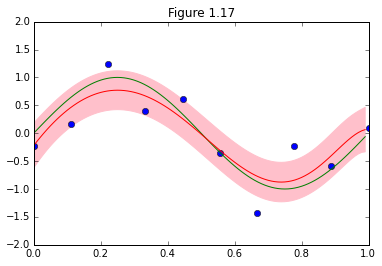

In [3]:
if __name__ == "__main__":
    alpha = 0.005
    Beta = 11.1
    M = 9
    
    #Sine curve
    x_real = np.arange(0, 1, 0.01)
    y_real = np.sin(2*np.pi*x_real)
    
    ##Training Data
    N=10
    x_train = np.linspace(0, 1, 10)
    
    #Set "small level of random noise having a Gaussian distribution"
    loc = 0
    scale = 0.3
    y_train =  np.sin(2*np.pi*x_train) + np.random.normal(loc,scale,N)
    
    
    S = S(x_train, y_train)
    
    #Seek predictive distribution corespponding to entire x
    mean = [m(x, x_train, y_train, S)[0,0] for x in x_real]
    variance = [s2(x, S)[0,0] for x in x_real]
    SD = np.sqrt(variance)
    upper = mean + SD
    lower = mean - SD
    
    
    plot(x_train, y_train, 'bo')
    plot(x_real, y_real, 'g-')
    plot(x_real, mean, 'r-')
    fill_between(x_real, upper, lower, color='pink')
    xlim(0.0, 1.0)
    ylim(-2, 2)
    title("Figure 1.17")

###References

Christopher Bishop. (2007). Pattern Recognition and Machine Learning (Information Science and Statistics). Springer